# Importing Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import astropy
from astropy.io import fits

%matplotlib inline

# Importing Data

In [14]:
# Importing unmasked data - NOTE: this .dat file is tab seperated
data = pd.read_csv("best_fit_solutions.v2.1.refit.dat", delimiter = "\t")
# Renaming column names
data.columns = ['ncomps', 
                'x',
                'y',
                'brightness_temp',
                'err_brightness_temp',
                'cent_vel',
                'err_cent_vel',
                'vel_disp',
                'err_vel_disp',
                'rms',
                'residual',
                'chisq',
                'dof',
                'redchisq',
                'aic']

# Importing masked data - NOTE: this .dat file is space separated
data_masked = pd.read_csv("best_fit_solutions.v2.1.refit_mask.dat", delimiter =" ")
# Renaming column names
data_masked.columns = ['ncomps', 
                'x',
                'y',
                'brightness_temp',
                'err_brightness_temp',
                'cent_vel',
                'err_cent_vel',
                'vel_disp',
                'err_vel_disp',
                'rms',
                'residual',
                'chisq',
                'dof',
                'redchisq',
                'aic']

# Importing mom1 data
hdul = astropy.io.fits.open('HC3N_TP_7m_12m_feather.mom1.fits', memmap=True)
mom1 = hdul[0].data

# Cleaning Data

In [15]:
# Removing ncomps=0 from unmasked data. Data set goes from 904893 to 897097 data points.

# print(len(data.index))
data = data.drop(data[data.ncomps == 0].index)
# print(len(data.index))

# Removing ncomps = 0 from masked data. Data set goes from 861060 to 856491 data points.
# print(len(data_masked.index))
data_masked = data_masked.drop(data_masked[data_masked.ncomps == 0].index)
# print(len(data_masked.index))

# Removing NaN values. Data goes from 929071 to 452368 data points. NOTE: data and data_masked do not contain any NaN values
no_nan_mom1 = mom1[~np.isnan(mom1)]
# print(len(mom1.flatten()))
# print(len(no_nan_mom1))

904893
897097
861060
856491
452368
929071


# Unmasked Centroid Velocity Histogram

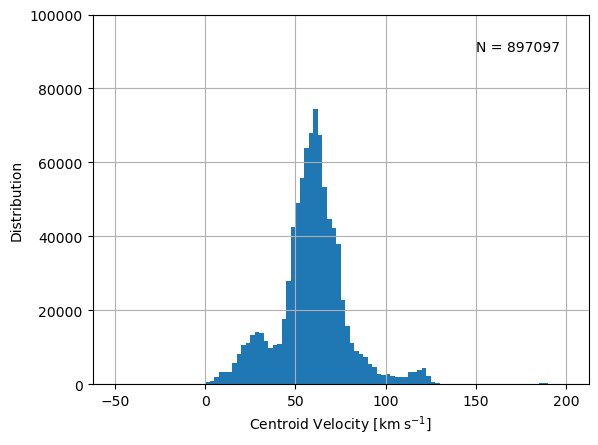

In [66]:
plt.hist(data.cent_vel, bins=100, range=(-50,200), color='tab:blue')
plt.ylabel("Distribution")
plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()
plt.ylim(0,100000)
plt.annotate("N = " + str(len(data.index)), (150, 90000))

# Saving the graph
# plt.savefig("figures/centroid_velocity_unmasked_histogram.png", dpi = 128, bbox_inches='tight')

plt.show()


# Unmasked Centroid Velocity Log Histogram

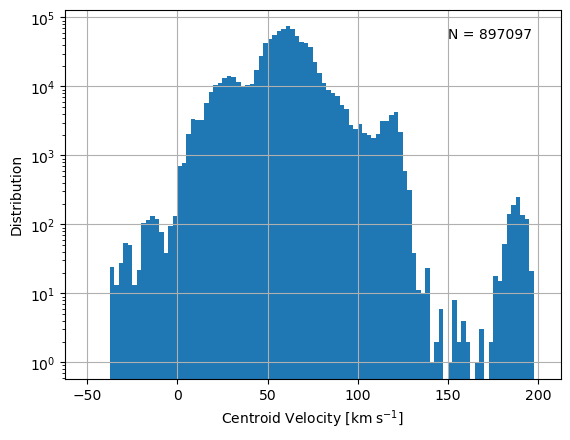

In [68]:
plt.hist(data.cent_vel, bins=100, range=(-50,200), color='tab:blue')
plt.ylabel("Distribution")
plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()
plt.annotate("N = " + str(len(data.index)), (150, 50000))
plt.yscale('log')

# Saving the graph
# plt.savefig("figures/centroid_velocity_unmasked_histogram_log.png", dpi = 128, bbox_inches='tight')

plt.show()

# Masked Centroid Velocity Histogram

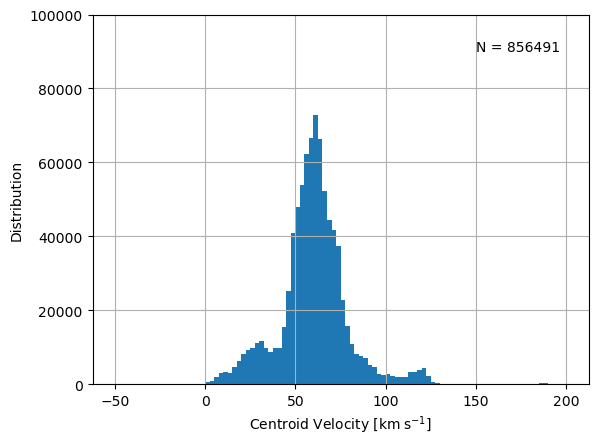

In [69]:
plt.hist(data_masked.cent_vel, bins=100, range=(-50,200), color='tab:blue')
plt.ylabel("Distribution")
plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()
plt.ylim(0,100000)
plt.annotate("N = " + str(len(data_masked.index)), (150, 90000))

# Saving the graph
# plt.savefig("figures/centroid_velocity_masked_histogram.png", dpi = 128, bbox_inches='tight')

plt.show()

# Masked Centroid Velocity Log Histogram

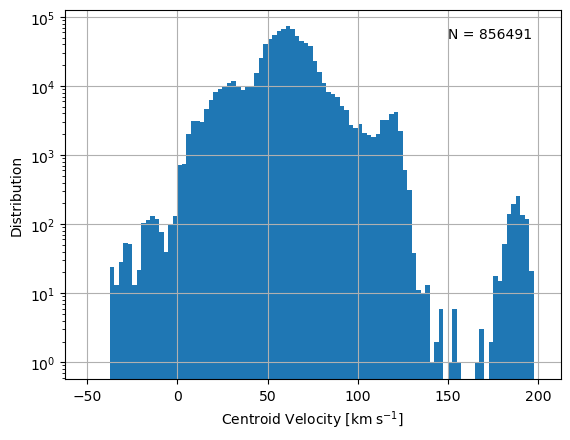

In [70]:
plt.hist(data_masked.cent_vel, bins=100, range=(-50,200), color='tab:blue')
plt.ylabel("Distribution")
plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()
plt.annotate("N = " + str(len(data_masked.index)), (150, 50000))
plt.yscale('log')

# Saving the graph
# plt.savefig("figures/centroid_velocity_masked_histogram_log.png", dpi = 128, bbox_inches='tight')

plt.show()

# Masked vs Unmasked Centroid Velocity Histogram

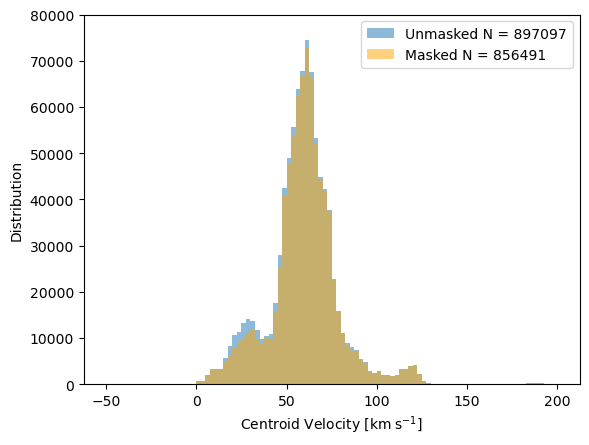

In [72]:
# Unmasked histogram parameters
bin_number = 100
x_min = -50
x_max = 200

# Masked histogram parameters
bin_number_masked = 100
x_min_masked = -50
x_max_masked = 200

# Unmasked Histogram

plt.hist(data.cent_vel, bins=bin_number, range=(x_min, x_max), color='tab:blue', alpha= 0.5)
plt.ylabel("Distribution")
plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()
plt.ylim(0,80000)

plt.hist(data_masked.cent_vel, bins=bin_number_masked, range=(x_min_masked, x_max_masked), color='orange', alpha= 0.5)
plt.ylabel("Distribution")
plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()
plt.ylim(0,80000)

# Legend
unmasked_size = (len(data['cent_vel']))
masked_size = (len(data_masked['cent_vel']))
plt.legend([f'Unmasked N = {unmasked_size}', f'Masked N = {masked_size}'])

# Saving the graph
# plt.savefig("figures/centroid_velocity_unmasked_X_masked_histogram.png", dpi = 128, bbox_inches='tight')

plt.show()

# Masked vs Unmasked Centroid Velocity Log Histogram

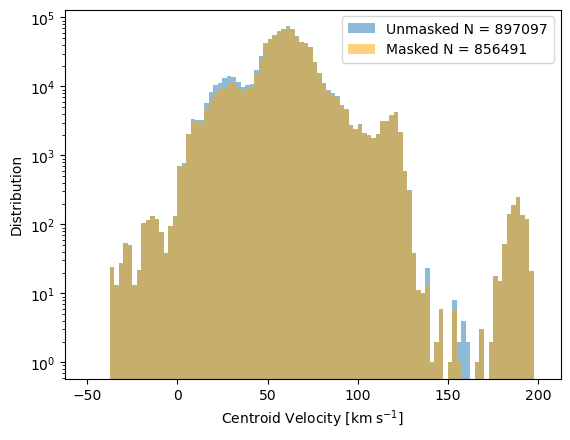

In [73]:
# Unmasked histogram parameters
bin_number = 100
x_min = -50
x_max = 200

# Masked histogram parameters
bin_number_masked = 100
x_min_masked = -50
x_max_masked = 200

# Unmasked Histogram
plt.hist(data.cent_vel, bins=bin_number, range=(x_min, x_max), color='tab:blue', alpha= 0.5)
plt.ylabel("Distribution")
plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()
plt.yscale('log')

# Masked histogram
plt.hist(data_masked.cent_vel, bins=bin_number_masked, range=(x_min_masked, x_max_masked), color='orange', alpha= 0.5)
plt.ylabel("Distribution")
plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()
plt.yscale('log')

# Legend
unmasked_size = (len(data['cent_vel']))
masked_size = (len(data_masked['cent_vel']))
plt.legend([f'Unmasked N = {unmasked_size}', f'Masked N = {masked_size}'])

# Saving the graph
# plt.savefig("figures/centroid_velocity_unmasked_X_masked_histogram_log.png", dpi = 128, bbox_inches='tight')

plt.show()

# Masked Centroid Velocity All Parts

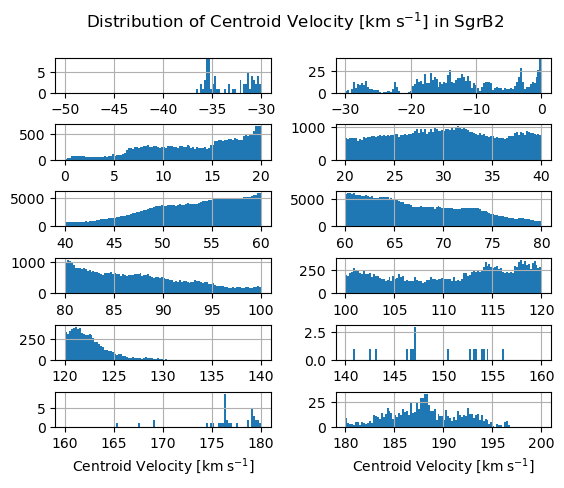

In [74]:
plt.suptitle("Distribution of Centroid Velocity [$\mathregular{km_ s^{-1}}$] in SgrB2")

# Centroid velocity range: -50 : -30
plt.subplot(6,2,1)
plt.hist(data_masked.cent_vel, bins=100, range=(-50,-30), color='tab:blue')
#plt.ylabel("Distribution")
#plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Centroid velocity range: -30 : 0
plt.subplot(6,2,2)
plt.hist(data_masked.cent_vel, bins=100, range=(-30,0), color='tab:blue')
#plt.title("Distribution of Centroid Velocity in Sgr B2")
#plt.ylabel("Distribution")
#plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Centroid velocity range: 0 : 20
plt.subplot(6,2,3)
plt.hist(data_masked.cent_vel, bins=100, range=(0,20), color='tab:blue')
#plt.title("Distribution of Centroid Velocity in Sgr B2")
#plt.ylabel("Distribution")
#plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Centroid velocity range: 20 : 40
plt.subplot(6,2,4)
plt.hist(data_masked.cent_vel, bins=100, range=(20,40), color='tab:blue')
#plt.title("Distribution of Centroid Velocity in Sgr B2")
#plt.ylabel("Distribution")
#plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Centroid velocity range: 40 : 60
plt.subplot(6,2,5)
plt.hist(data_masked.cent_vel, bins=100, range=(40,60), color='tab:blue')
#plt.title("Distribution of Centroid Velocity in Sgr B2")
#plt.ylabel("Distribution")
#plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Centroid velocity range: 60 : 80
plt.subplot(6,2,6)
plt.hist(data_masked.cent_vel, bins=100, range=(60,80), color='tab:blue')
#plt.title("Distribution of Centroid Velocity in Sgr B2")
#plt.ylabel("Distribution")
#plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Centroid velocity range: 80 : 100
plt.subplot(6,2,7)
plt.hist(data_masked.cent_vel, bins=100, range=(80,100), color='tab:blue')
#plt.title("Distribution of Centroid Velocity in Sgr B2")
#plt.ylabel("Distribution")
#plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Centroid velocity range: 100 : 120
plt.subplot(6,2,8)
plt.hist(data_masked.cent_vel, bins=100, range=(100,120), color='tab:blue')
#plt.title("Distribution of Centroid Velocity in Sgr B2")
#plt.ylabel("Distribution")
#plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Centroid velocity range: 120 : 140
plt.subplot(6,2,9)
plt.hist(data_masked.cent_vel, bins=100, range=(120,140), color='tab:blue')
#plt.title("Distribution of Centroid Velocity in Sgr B2")
#plt.ylabel("Distribution")
#plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Centroid velocity range: 140 : 160
plt.subplot(6,2,10)
plt.hist(data_masked.cent_vel, bins=100, range=(140,160), color='tab:blue')
#plt.title("Distribution of Centroid Velocity in Sgr B2")
#plt.ylabel("Distribution")
#plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Centroid velocity range: 160 : 180
plt.subplot(6,2,11)
plt.hist(data_masked.cent_vel, bins=100, range=(160,180), color='tab:blue')
#plt.title("Distribution of Centroid Velocity in Sgr B2")
#plt.ylabel("Distribution")
plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Centroid velocity range: 180 : 200
plt.subplot(6,2,12)
plt.hist(data_masked.cent_vel, bins=100, range=(180,200), color='tab:blue')
#plt.title("Distribution of Centroid Velocity in Sgr B2")
#plt.ylabel("Distribution")
plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Spacing between plots
plt.subplots_adjust(hspace=0.9, wspace=0.3)

# Saving the graph
#plt.savefig("figures/centroid_velocity_masked_histogram_sections.png", dpi = 128, bbox_inches='tight')

plt.show()

# Masked Centroid Velocity Parts Of Interest

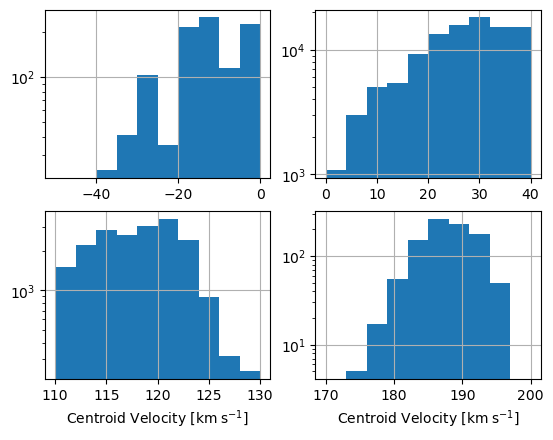

In [75]:
#plt.suptitle("Distribution of Centroid Velocity [$\mathregular{km_ s^{-1}}$] in SgrB2")

# Centroid velocity range: -50 : 0
plt.subplot(2,2,1)
plt.hist(data_masked.cent_vel, bins=10, range=(-50,0), color='tab:blue')
#plt.ylabel("Distribution")
#plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()
plt.yscale('log')

# Centroid velocity range: 0 : 40
plt.subplot(2,2,2)
plt.hist(data_masked.cent_vel, bins=10, range=(0,40), color='tab:blue')
#plt.ylabel("Distribution")
#plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()
plt.yscale('log')

# Centroid velocity range: 110 : 130
plt.subplot(2,2,3)
plt.hist(data_masked.cent_vel, bins=10, range=(110,130), color='tab:blue')
#plt.ylabel("Distribution")
plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()
plt.yscale('log')

# Centroid velocity range: 170 : 200
plt.subplot(2,2,4)
plt.hist(data_masked.cent_vel, bins=10, range=(170,200), color='tab:blue')
#plt.ylabel("Distribution")
plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()
plt.yscale('log')

# Saving the graph
#plt.savefig("figures/centroid_velocity_masked_histogram_interest_sections.png", dpi = 128, bbox_inches='tight')

plt.show()



# Unmasked vs mom1 Centroid Velocity Overlay Histogram

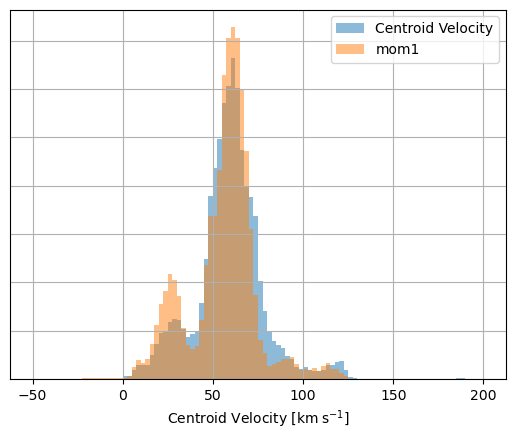

In [58]:
# With density = True the histogram will be normalised
plt.hist(data.cent_vel, bins=100, range=(-50,200), color='tab:blue', alpha=0.5, density=True)
plt.hist(no_nan_mom1, bins=100, range=(-50,200), color='tab:orange', alpha=0.5, density=True)
plt.tick_params(left = False, labelleft = False ,
                labelbottom = True, bottom = True)
plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Legend
plt.legend(['Centroid Velocity', 'mom1'])

# Saving the graph
#plt.savefig("figures/centroid_velocity_unmasked_X_mom1_normalised.png, dpi = 128, bbox_inches='tight'")

plt.show()

# Masked vs mom1 Centroid Velocity Overlay Histogram

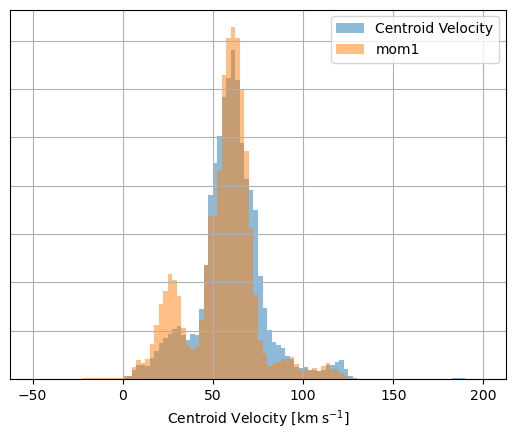

In [76]:
# With density = True the histogram will be normalised
plt.hist(data_masked.cent_vel, bins=100, range=(-50,200), color='tab:blue', alpha=0.5, density=True)
plt.hist(no_nan_mom1, bins=100, range=(-50,200), color='tab:orange', alpha=0.5, density=True)
plt.tick_params(left = False, labelleft = False ,
                labelbottom = True, bottom = True)
plt.xlabel("Centroid Velocity [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Legend
plt.legend(['Centroid Velocity', 'mom1'])

# Saving the graph
#plt.savefig("figures/centroid_velocity_masked_X_mom1_normalised.png", dpi = 128, bbox_inches='tight')

plt.show()